In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jeetg\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [1]:
import numpy as np
import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras_preprocessing.image import ImageDataGenerator

In [12]:
train_dir = 'C:\\Users\\jeetg\\code\\emojify\\train'
val_dir = 'C:\\Users\\jeetg\\code\\emojify\\test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

c:\Users\jeetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
emotion_model.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(learning_rate=0.0001, decay=1e-6), 
    metrics=['accuracy']
)

emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64, 
    epochs=50,
    validation_data=validation_generator,
    validation_steps=7178 // 64
)

c:\Users\jeetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 65s 140ms/step - accuracy: 0.2474 - loss: 1.8274 - val_accuracy: 0.3324 - val_loss: 1.6988
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.3906 - loss: 1.8268 - val_accuracy: 0.3000 - val_loss: 1.7465
Epoch 3/50


c:\Users\jeetg\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 64s 143ms/step - accuracy: 0.3611 - loss: 1.6391 - val_accuracy: 0.3997 - val_loss: 1.5377
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.3750 - loss: 1.4803 - val_accuracy: 0.3000 - val_loss: 1.5798
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 61s 136ms/step - accuracy: 0.4092 - loss: 1.5365 - val_accuracy: 0.4489 - val_loss: 1.4522
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.4688 - loss: 1.4291 - val_accuracy: 0.6000 - val_loss: 1.2156
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 64s 142ms/step - accuracy: 0.4339 - loss: 1.4600 - val_accuracy: 0.4720 - val_loss: 1.3949
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.5781 - loss: 1.2862 - val_accuracy: 0.4000 - val_loss: 1.4089
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 62s 138ms/step - accuracy: 0.4714 - loss: 1.3903 - val_accuracy: 0.4944 - val_loss: 1.3370
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 0.4688 - loss: 1.2252 - val_accura

In [18]:
emotion_model.save_weights('emojify_model.weights.h5')

In [19]:
import os
import urllib.request

# Specific Path Configuration
BASE_PATH = r'C:\\Users\\jeetg\\code\\emojify'
HAAR_CASCADE_FILENAME = 'haarcascade_frontalface_default.xml'
HAAR_CASCADE_PATH = os.path.join(BASE_PATH, HAAR_CASCADE_FILENAME)

def download_haar_cascade():
    # OpenCV Haar Cascade Official URL
    url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
    
    # Check if file exists
    if not os.path.exists(HAAR_CASCADE_PATH):
        print(f"Downloading Haar Cascade to: {HAAR_CASCADE_PATH}")
        
        try:
            urllib.request.urlretrieve(url, HAAR_CASCADE_PATH)
            print("Haar Cascade downloaded successfully!")
        except Exception as e:
            print(f"Download failed: {e}")
            return None
    
    return HAAR_CASCADE_PATH

# Usage in your script
cascade_path = download_haar_cascade()

Haar Cascade downloaded successfully!


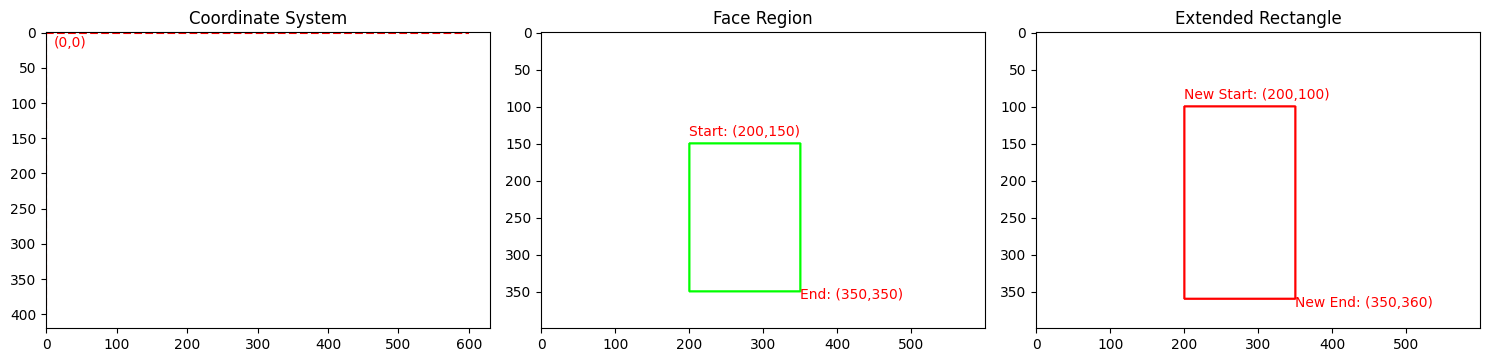

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_rectangle_drawing():
    # Create a blank white image
    image = np.ones((400, 600, 3), dtype=np.uint8) * 255
    
    # Simulated face detection coordinates
    x, y = 200, 150  # Top-left corner of face
    w, h = 150, 200  # Width and Height of face

    # Visualization stages
    plt.figure(figsize=(15, 5))

    # 1. Original Image with Coordinate System
    plt.subplot(131)
    plt.title("Coordinate System")
    plt.imshow(image, cmap='gray')
    plt.plot([0, 600], [0, 0], 'r--')  # X-axis
    plt.plot([0, 0], [0, 400], 'r--')  # Y-axis
    plt.text(10, 20, "(0,0)", color='red')
    plt.axis('on')

    # 2. Face Region Highlighting
    plt.subplot(132)
    plt.title("Face Region")
    # Draw the original face rectangle
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(image)
    
    # Annotate coordinates
    plt.text(x, y-10, f"Start: ({x},{y})", color='red')
    plt.text(x+w, y+h+10, f"End: ({x+w},{y+h})", color='red')
    plt.axis('on')

    # 3. Extended Rectangle Demonstration
    plt.subplot(133)
    plt.title("Extended Rectangle")
    # Draw extended rectangle
    extended_image = np.ones((400, 600, 3), dtype=np.uint8) * 255
    cv2.rectangle(
        extended_image, 
        (x, y-50),      # Moved up by 50 pixels
        (x+w, y+h+10),  # Extended down by 10 pixels
        (255, 0, 0),    # Blue color
        2               # Thickness
    )
    plt.imshow(extended_image)
    
    # Annotate extended coordinates
    plt.text(x, y-60, f"New Start: ({x},{y-50})", color='red')
    plt.text(x+w, y+h+20, f"New End: ({x+w},{y+h+10})", color='red')
    plt.axis('on')

    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_rectangle_drawing()

In [6]:
import cv2
import numpy as np
import os
from tensorflow import keras
# OpenCL Optimization
cv2.ocl.setUseOpenCL(False)

emotion_model.load_weights("C:\\Users\\jeetg\\code\\emojify\\emojify_model.weights.h5")

# Emotion Dictionary
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 
                3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Specify the correct path to the Haar Cascade XML file
CASCADE_PATH = r'C:\\Users\\jeetg\\code\\emojify\\haarcascade_frontalface_default.xml'

# Verify file exists
if not os.path.exists(CASCADE_PATH):
    raise FileNotFoundError(f"Haar Cascade file not found at {CASCADE_PATH}")

# Load Cascade Classifier
bounding_box = cv2.CascadeClassifier(CASCADE_PATH)

# Open Video Capture
cap = cv2.VideoCapture(0)

while True:
    # Read Frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Correct Grayscale Conversion (FIXED)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect Faces
    num_faces = bounding_box.detectMultiScale(
        gray_frame, 
        scaleFactor=1.3, 
        minNeighbors=5
    )

    # Process Each Face
    for (x, y, w, h) in num_faces:
        # Draw Rectangle
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        
        # Crop and Preprocess Face
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(
            np.expand_dims(
                cv2.resize(roi_gray_frame, (48, 48)), 
                -1
            ), 
            0
        )
        
        # Predict Emotion
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        
        # Display Emotion
        cv2.putText(
            frame, 
            emotion_dict[maxindex], 
            (x+20, y-60), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            1, 
            (255, 255, 255), 
            2, 
            cv2.LINE_AA
        )

    # Display Frame
    cv2.imshow('Video', cv2.resize(frame, (1200, 860), interpolation=cv2.INTER_CUBIC))
    
    # Exit Condition
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━